# Rock Paper Scissors

In [1]:
from games.rps import RPS
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [2]:
#initialize game
game = RPS()
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: ['R', 'P', 'S']
Number of Actions: 3
Action Spaces: {'agent_0': Discrete(3), 'agent_1': Discrete(3)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

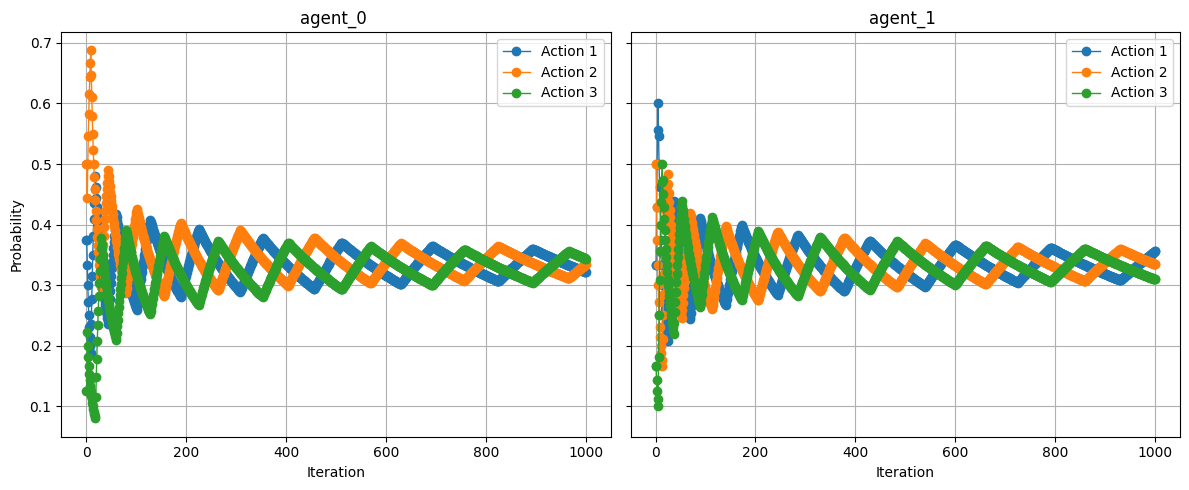

In [3]:
fp_agents = {agent: FictitiousPlay(game, agent) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=1000, title_suffix="")

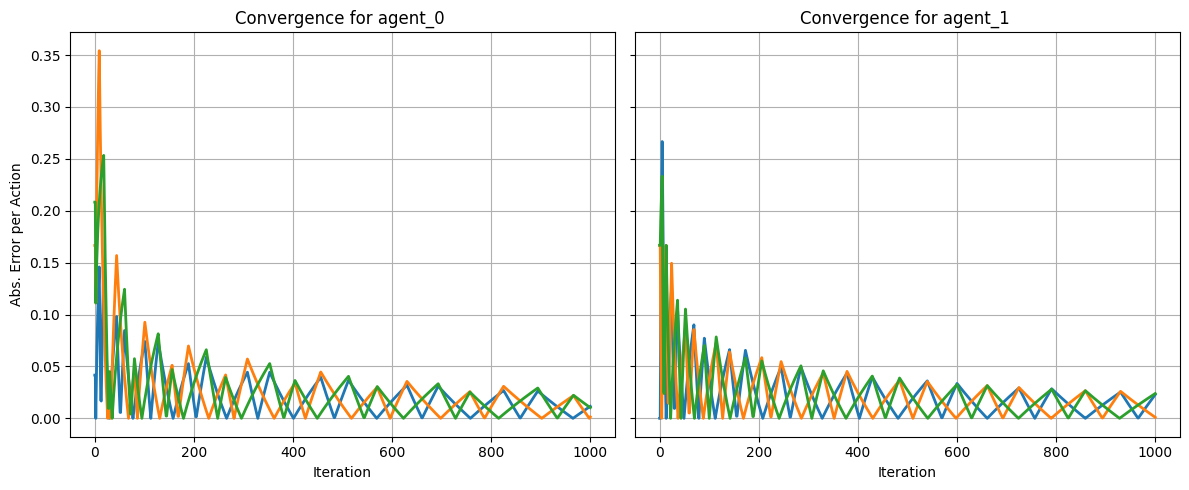

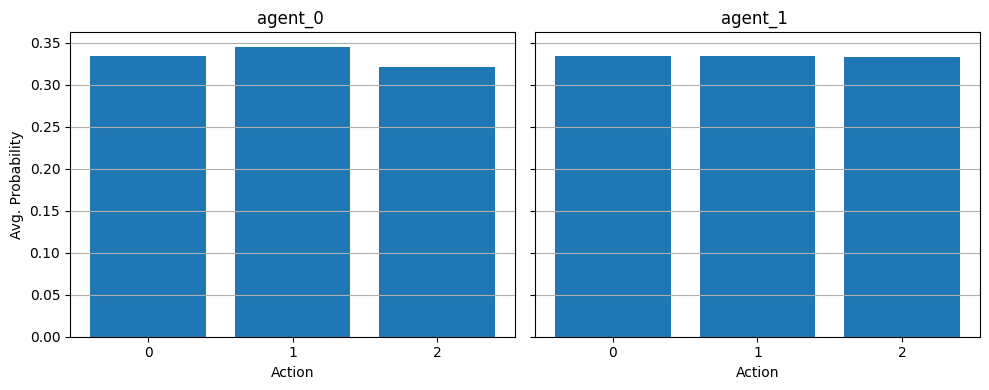

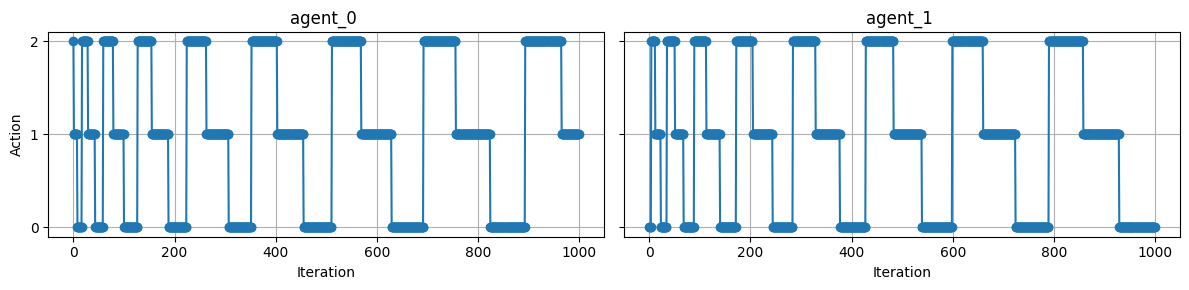

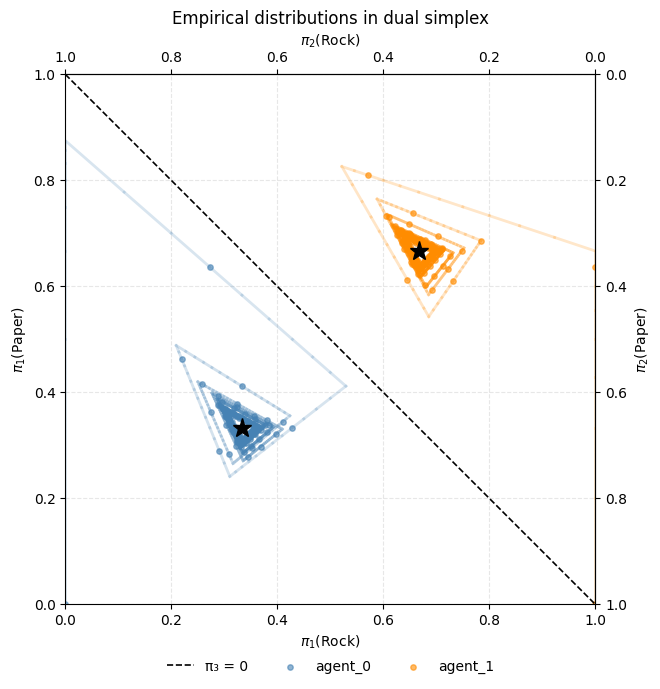

In [4]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

empirical = compute_empirical_distributions(action_history)


plot_dual_agent_simplex(empirical)


In [5]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())


agent_0 [0.32174777 0.3346574  0.34359484]
agent_1 [0.35621891 0.33432836 0.30945274]


# Regret Matching vs Regret Matching

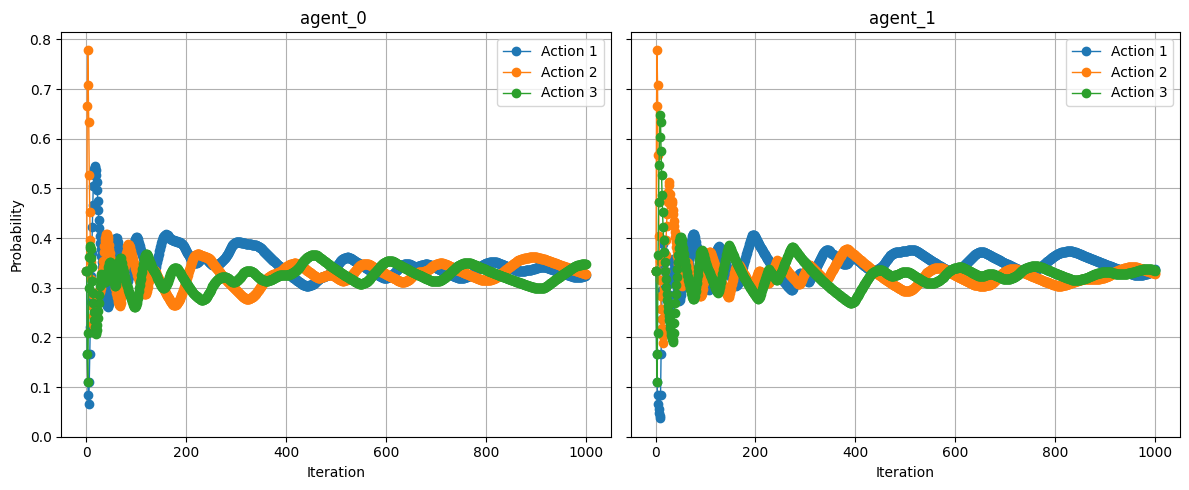

In [6]:
rm_agents = {agent: RegretMatching(game, agent) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=1000, title_suffix="")

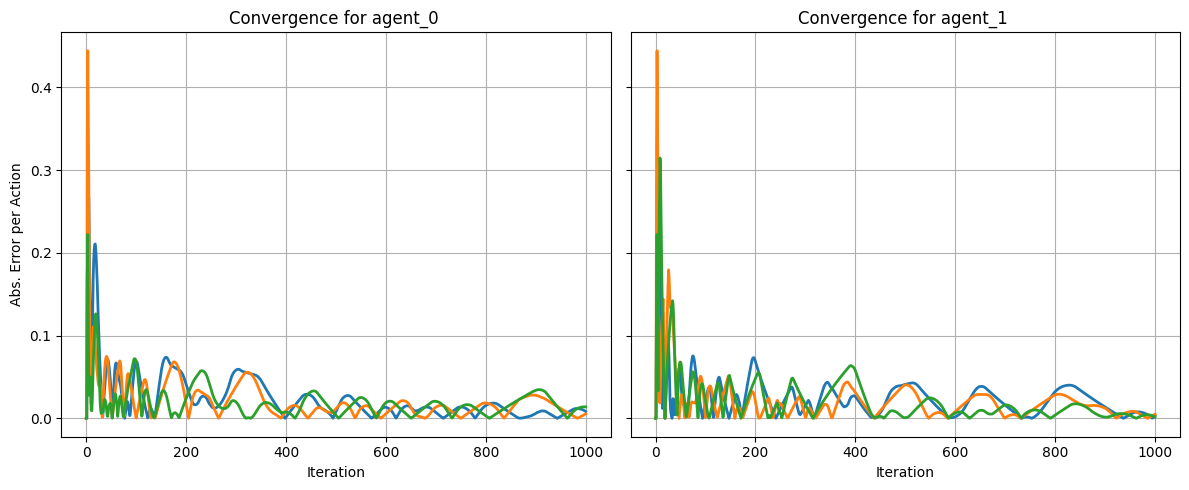

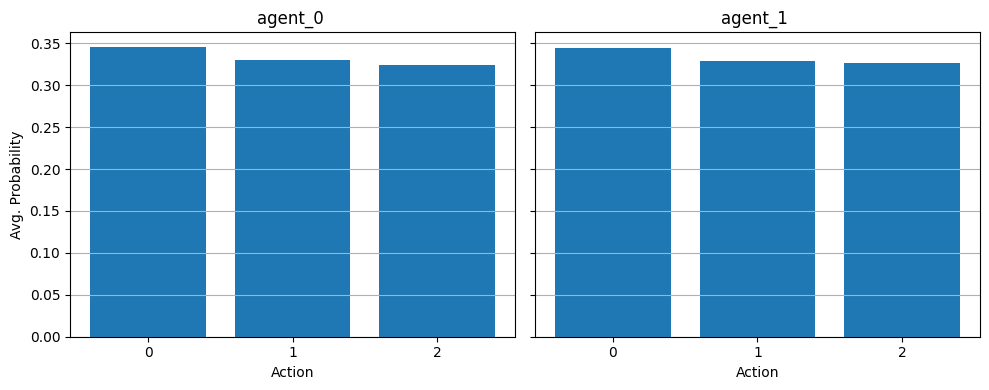

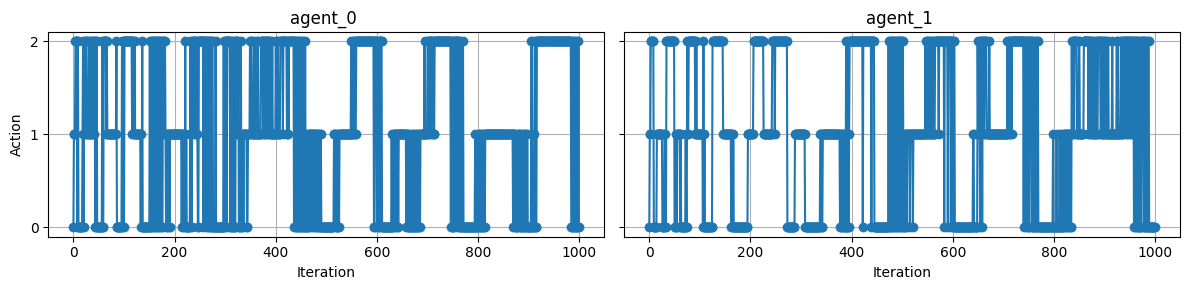

In [7]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [8]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())


agent_0 [0.32497529 0.3278741  0.34715061]
agent_1 [0.33699478 0.32837031 0.33463491]


# Fictitious Play vs Regret Matching

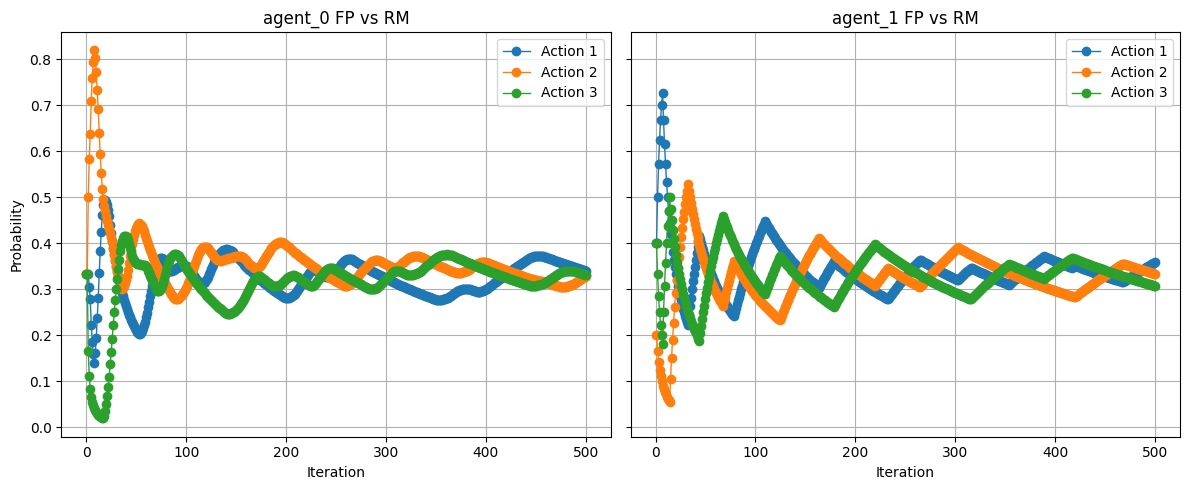

In [9]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0]),
              agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=500, title_suffix="FP vs RM")

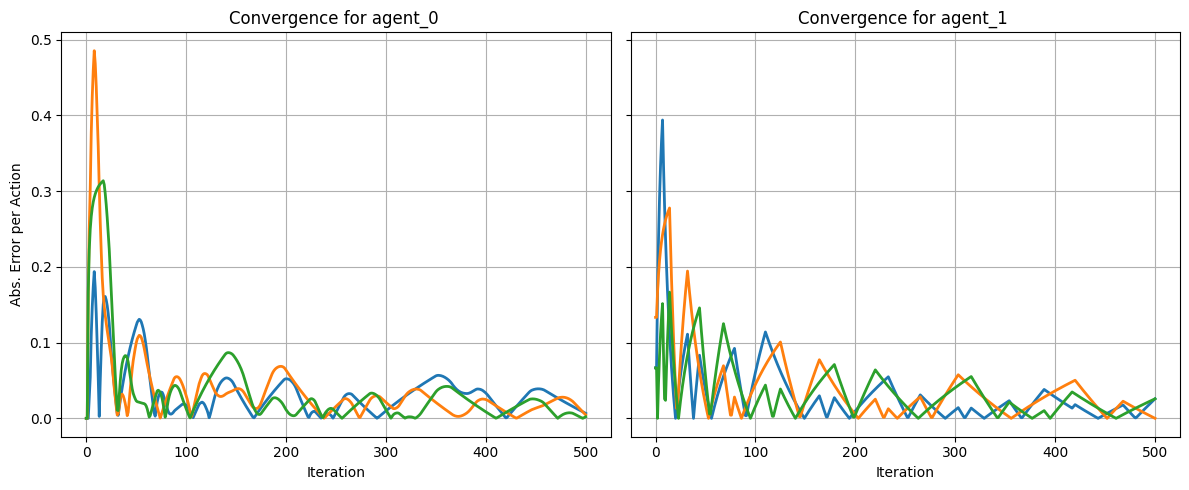

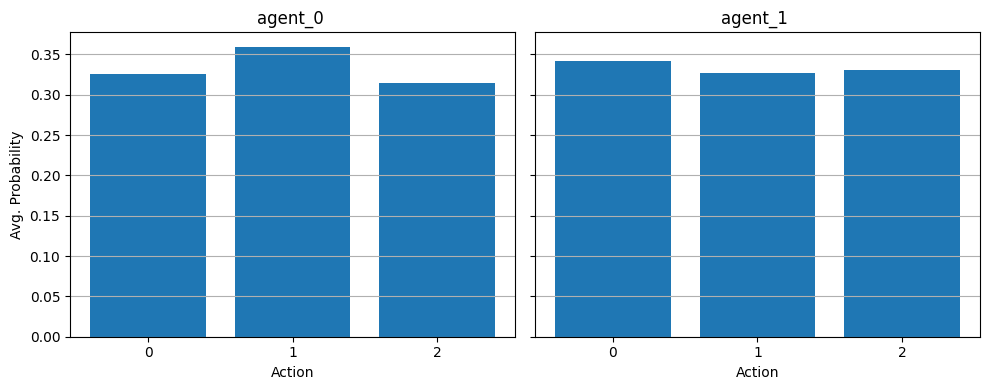

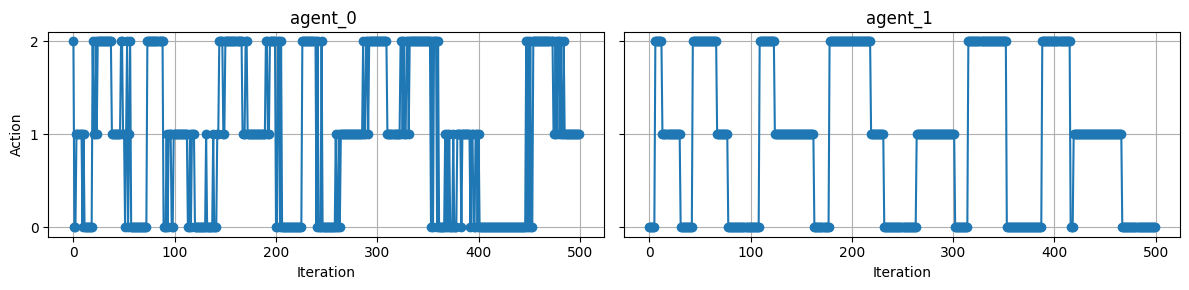

In [10]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Random Agent

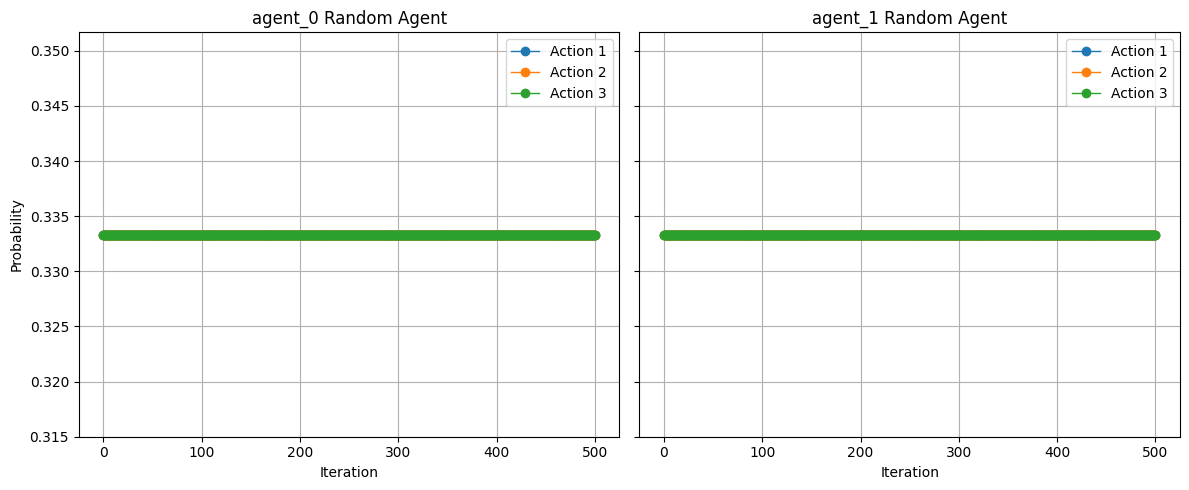

In [11]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=500, title_suffix="Random Agent")

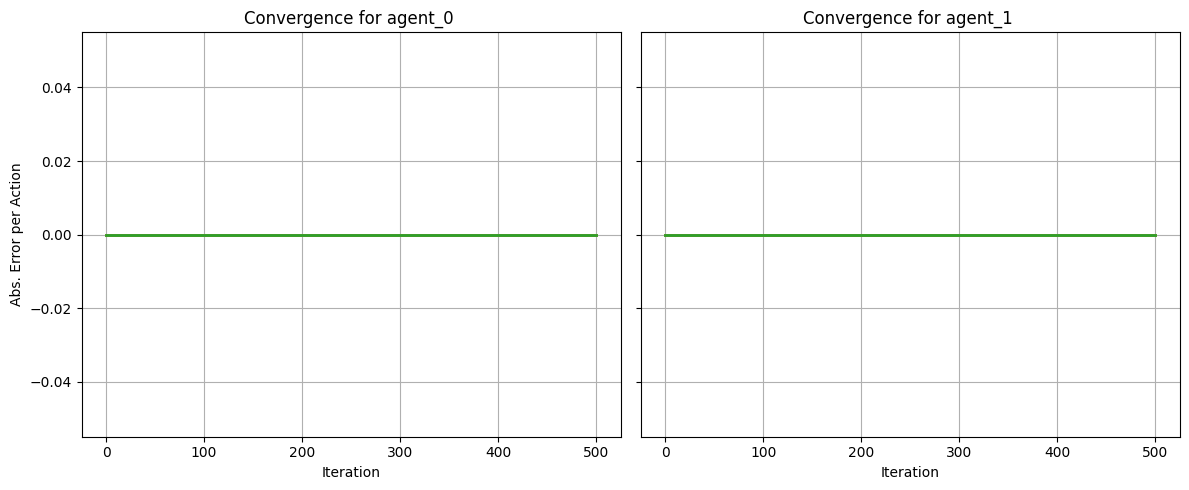

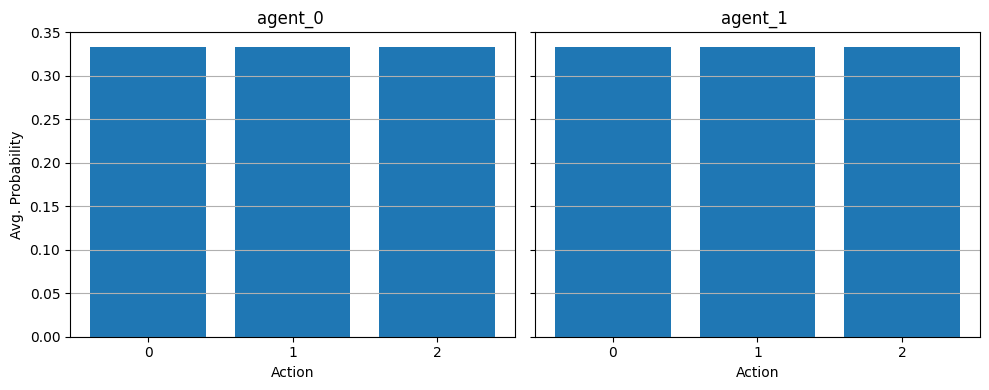

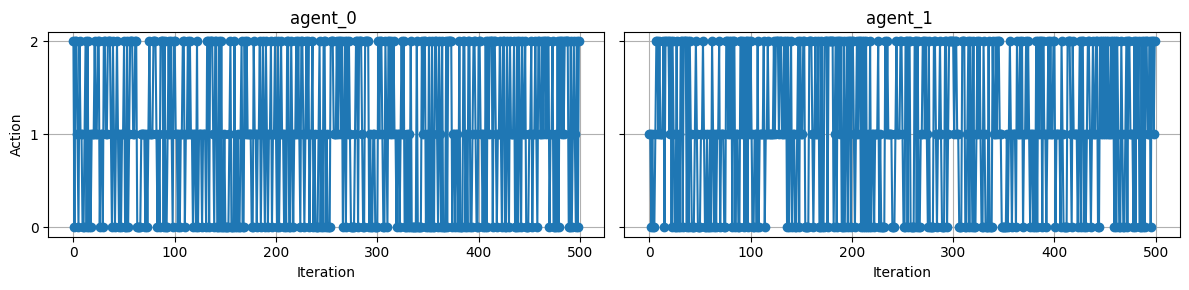

In [12]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

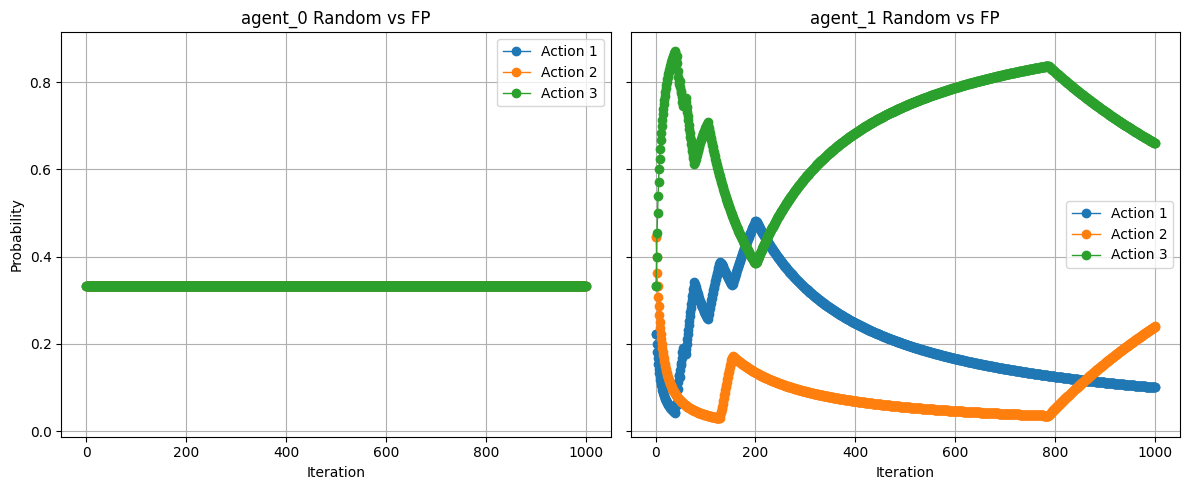

In [13]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=1000, title_suffix="Random vs FP")

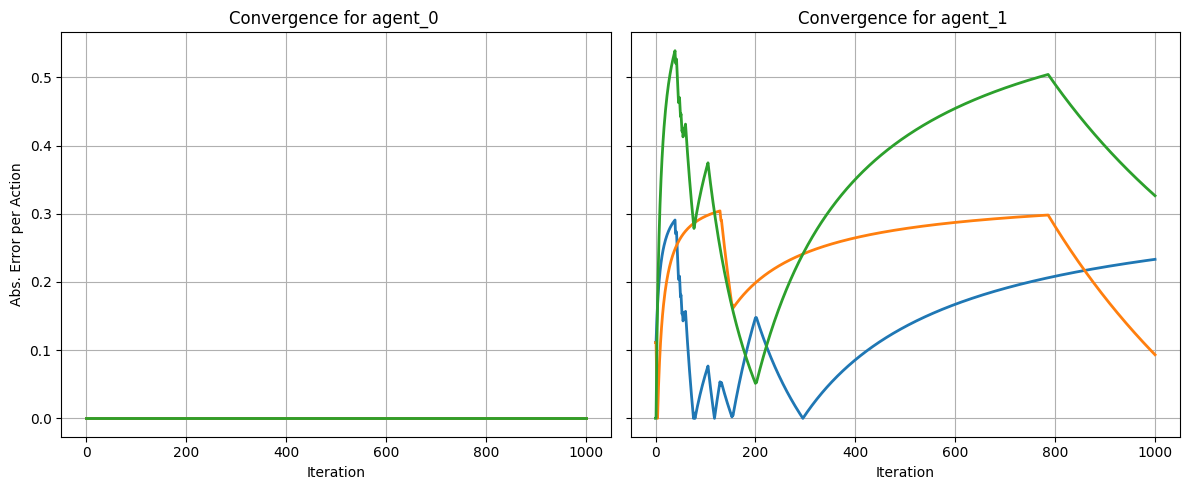

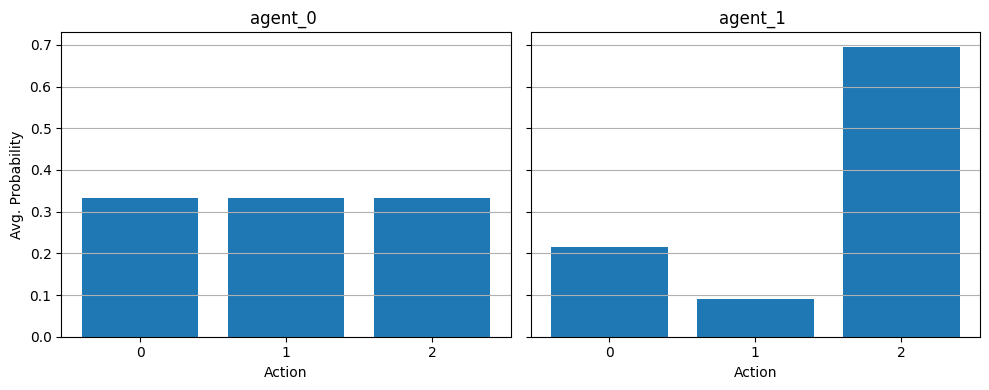

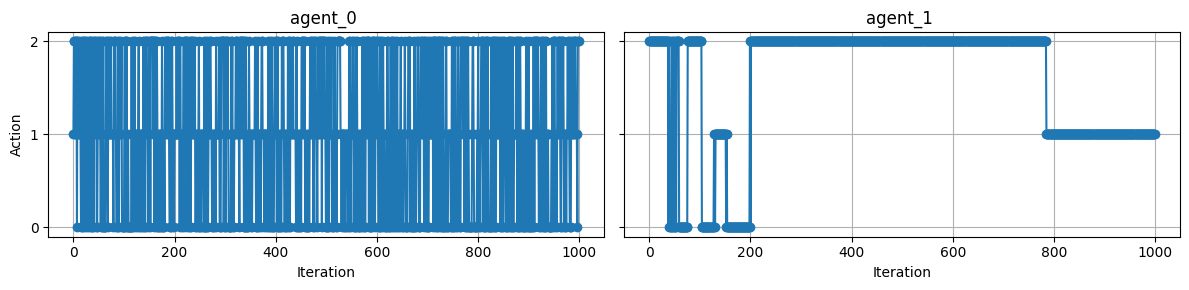

In [14]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Regret Matching


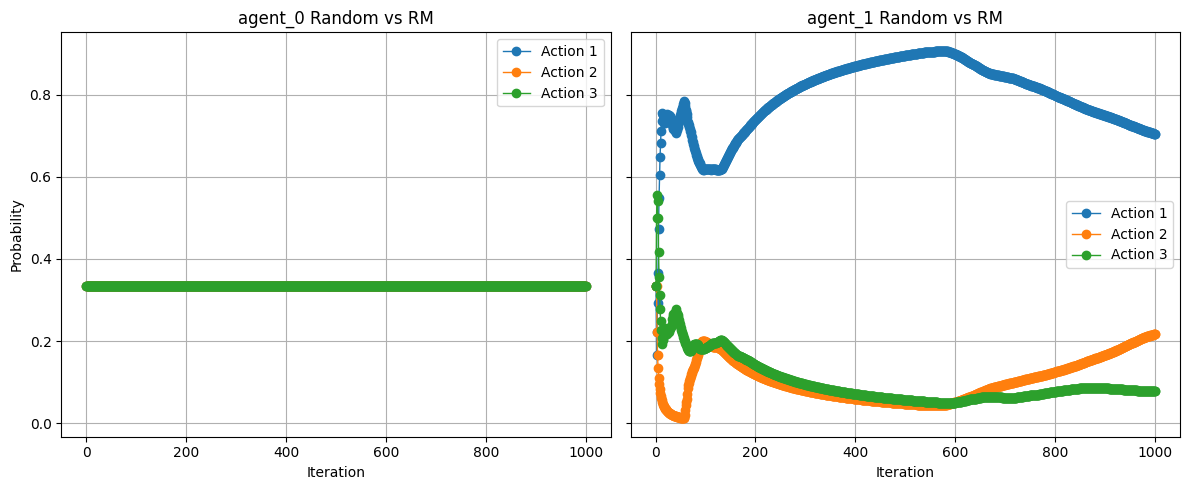

In [15]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=1000, title_suffix="Random vs RM")

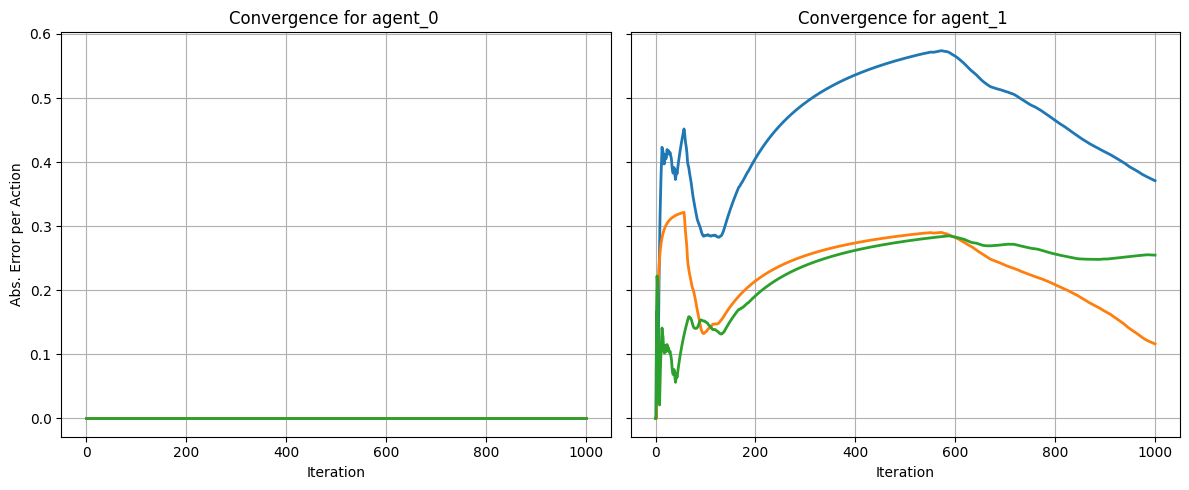

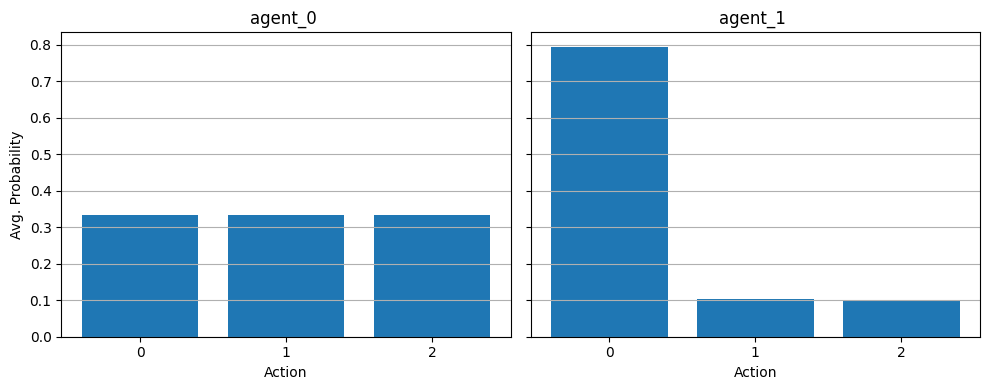

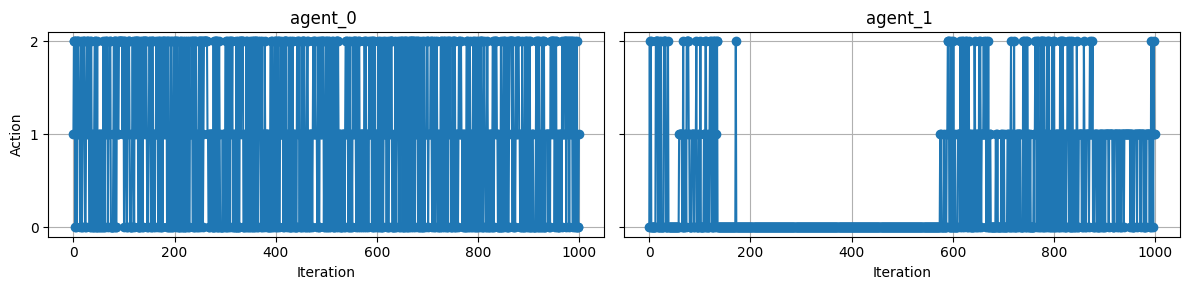

In [16]:
nash_equilibrium = {
    agent: [1 / game.num_actions(agent)] * game.num_actions(agent)
    for agent in game.agents
}
plot_convergence_to_nash(policies, nash_equilibrium)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)